In [14]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
data = pd.read_csv('data.csv')
x = np.asarray(data.iloc[:, 2],dtype = np.float32).reshape(-1,1)
y_correct = np.asarray(data.iloc[:, 3],dtype = np.float32).reshape(-1,1)

In [16]:
class RegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):

        super(RegressionModel, self).__init__() 
        # Calling Super Class's constructor
        
        self.linear = nn.Linear(input_dim, output_dim)

        
    def forward(self, x):
        # Here the forward pass is simply a linear function
        out = self.linear(x)
        return out

In [17]:
n = len(x)
m = 4

In [18]:
input_dim = 4
output_dim = 1

In [19]:
x_train = np.zeros(shape=(n,m))
# x_train = x

In [20]:
for i in range(0, n):
    for j in range(0, m):
        x_train[i][j] = np.power(x[i], (j+1))

print(x_train)
#print(type(x_train))

[[-2.          4.         -8.         16.        ]
 [-1.          1.         -1.          1.        ]
 [ 0.89999998  0.80999994  0.72899997  0.65609992]
 [ 1.          1.          1.          1.        ]
 [ 2.          4.          8.         16.        ]]


In [21]:
model = RegressionModel(input_dim,output_dim)

criterion = nn.MSELoss()# Mean Squared Loss

l_rate = 0.001

#optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) #Stochastic Gradient Descent

#optimiser = torch.optim.SGD(model.parameters(), lr = l_rate, momentum=0.01) #Momentum at 0.01
#optimiser = torch.optim.SGD(model.parameters(), lr = l_rate, momentum=0.5) #Momentum at 0.5


#optimiser = torch.optim.SGD(model.parameters(), lr = l_rate,momentum=0.5,nesterov= True) #Nestorv
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate,momentum=0.01,nesterov= True) #Nestorv



epochs = 1000

In [22]:
for epoch in range(epochs):

    epoch +=1
    #increase the number of epochs by 1 every time
    
    inputs = Variable(torch.from_numpy(x_train)).float()
    yvals = Variable(torch.from_numpy(y_correct))

    #clear grads 
    optimiser.zero_grad()
    
    
    #forward to get predicted values
    outputs = model.forward(inputs)
    loss = criterion(outputs, yvals)
    
    loss.backward() # back props
    
    optimiser.step() # update the parameters
    #print(outputs)
    #print('epoch {}, loss {}'.format(epoch,loss.data[0]))

In [23]:
#predicted = model.forward(Variable(torch.from_numpy(x_train))).data.numpy()
predicted = model.forward(torch.from_numpy(x_train).float()).data.numpy()
result = model.state_dict()
print(result)

OrderedDict([('linear.weight', tensor([[0.0333, 0.1629, 0.0465, 0.2035]])), ('linear.bias', tensor([0.1030]))])


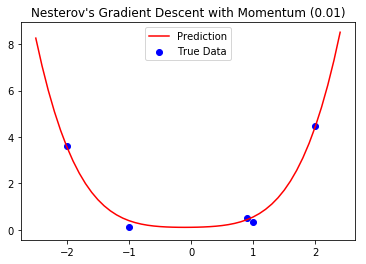

In [24]:
#plotting line
plotx = np.arange(-2.5, 2.5, 0.1)
coefficients = result['linear.weight'].tolist()[0]
bias =result['linear.bias'].tolist()[0]

ploty = bias + coefficients[0]*(plotx) + coefficients[1]*(plotx**2) + coefficients[2]*(plotx**3)+ coefficients[3]*(plotx**4)
plt.plot(plotx,ploty, label = 'Prediction', color = "red")

#plotting old data
plt.scatter(x, y_correct, label ="True Data", color = "Blue")

plt.title("Nesterov's Gradient Descent with Momentum (0.01)")
plt.legend()

In [25]:
#Starting the testing process
testdata = pd.read_csv('valz.csv')
testx = testdata.iloc[:, 1]
testy = testdata.iloc[:, 2] 

In [26]:
yhat = bias + coefficients[0]*(testx) + coefficients[1]*(testx**2) + coefficients[2]*(testx**3)+ coefficients[3]*(testx**4)
error = np.linalg.norm((testy-yhat))
print(error)

7.854202935705193
